<a href="https://colab.research.google.com/github/esh04/Clickbait-Identification/blob/main/Clickbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




---


# **CLICKBAIT ANALYSIS ON HINDI DATASETS**

---




In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Loading the given dataset and storing the sentences to be analysed in a variable

In [2]:
path = "./data/trainData.csv"
df = pd.read_csv(path)
df.drop('id', inplace=True, axis=1)
df

,sentence,label
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0
...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0


In [3]:
#Stores sentences to be analysed
sentence_list = df['sentence'].to_list()


## Preprocessing the dataset by-


1.   Replacing the ASCII values of several punctuations and sentence endings appropriately
2.   Removing unnecessary punctuations which does not benefit the analysis





In [4]:
new_sentence_list = []
for sent in sentence_list:
  sent = sent.replace('\n','')
  sent = sent.replace('&#39',"'")
  sent = sent.replace('&#39;',"'")
  sent = sent.replace('quot;','"')
  sent = sent.replace('&','')
  sent = sent.replace('#','')
  sent = sent.replace('$','')
  sent = sent.replace('%','')
  sent = sent.replace('-','')
  sent = sent.replace('...','')
  new_sentence_list.append(sent)


## Creating functions to remove unnecessary-


1.   English and other foreign characters
2.   Numbers which aren't relevant with the data



In [5]:
#FUNCTION TO REMOVE NUMERALS
import re 
def remove_num(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    return list

def remove_caps(list):
    pattern = '[a-zA-Z]+'
    list = [re.sub(pattern, '', i) for i in list]
    return list
  
#new_sentence_list = remove_num(new_sentence_list)
#new_sentence_list = remove_caps(new_sentence_list)





---


# **ANALYSIS**


---



## Analysis And Plot based on Number Of Word Tokens

In [6]:
#sentence tokens for judging
from nltk.tokenize import sent_tokenize, word_tokenize

In [7]:
no_of_tokens = []
list_of_tokens = []
for i in new_sentence_list:
  token_list = []
  for t in word_tokenize(i): 
    token_list.append(t)
  no_of_tokens.append(len(token_list))

  #maintain a list containing list of all tokens in a sentence
  list_of_tokens.append(token_list)

#add new column for analysis
df = df.assign(num_tokens = no_of_tokens)
df

,sentence,label,num_tokens
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8
...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7


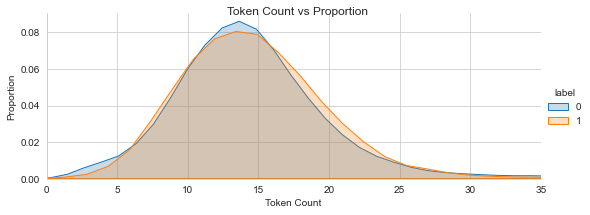

In [8]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_tokens',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 35))
plotOne.add_legend()
plotOne.set_axis_labels('Token Count', 'Proportion')
plotOne.fig.suptitle('Token Count vs Proportion')
plt.show()

## Analysis And Plot based on the presence of a Question Mark (?)

In [9]:
#This checks for presence of ?
is_it_que = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("?"):  
      count = count + 1;  
  is_it_que.append(count)
df = df.assign(is_que = is_it_que)
df

,sentence,label,num_tokens,is_que
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0
...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0


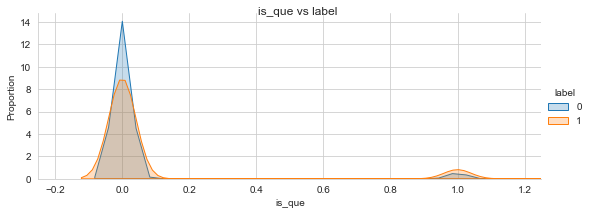

In [10]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_que',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_que', 'Proportion')
plotOne.fig.suptitle('is_que vs label')
plt.show()

## Analysis And Plot based on the presence of a Exclamation Mark (!)

In [11]:
#This checks for presence of !
is_it_exclam = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("!"):  
      count = count + 1;  
  is_it_exclam.append(count)
df = df.assign(is_exclam = is_it_exclam)
df

,sentence,label,num_tokens,is_que,is_exclam
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0
...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0


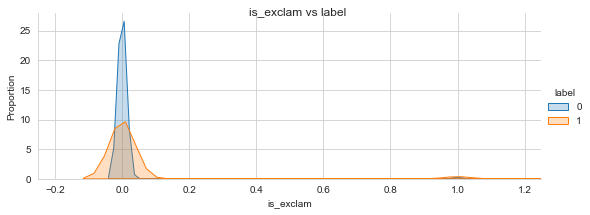

In [12]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_exclam',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_exclam', 'Proportion')
plotOne.fig.suptitle('is_exclam vs label')
plt.show()

## Analysis And Plot based on the presence of a Quotation Marks 

In [13]:
#This checks for presence of quotes
is_it_quote = []
for i in new_sentence_list:
  count = 0;
  for j in range(0,len(i)):
    if i[j] in ("'", '"'):  
      count = 1;  
  is_it_quote.append(count)
df = df.assign(is_quote = is_it_quote)
df

,sentence,label,num_tokens,is_que,is_exclam,is_quote
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0
...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0


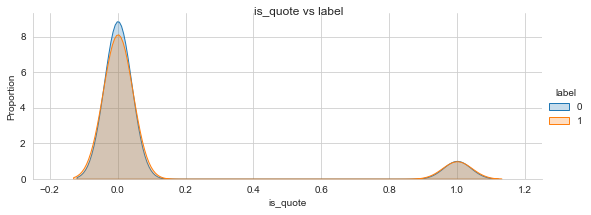

In [14]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'is_quote',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(-0.25, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('is_quote', 'Proportion')
plotOne.fig.suptitle('is_quote vs label')
plt.show()

## Analysis and Plot based on Number Of Stop Words in each sentence

In [15]:
#Number of stopwords in the headline
def count_stopwords(sentence_list,df):
    filename = './data/stopwords.txt'
    file = open(filename, 'rt')
    stop_words = file.read()
    file.close()
    count_stopwords = []
    for sentence in sentence_list:
        count = 0;
        for word in sentence:
            if word in stop_words:  
              count += 1;  
        count_stopwords.append(count)
    df = df.assign(num_stopwords = count_stopwords)
    return df

df = count_stopwords(list_of_tokens,df)
df
        

,sentence,label,num_tokens,is_que,is_exclam,is_quote,num_stopwords
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0,19
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0,5
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0,13
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0,5
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0,2
...,...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1,4
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0,7
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0,4
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0,2


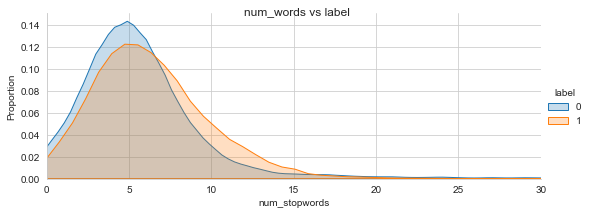

In [16]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'num_stopwords',shade=True)
plotOne.set(xlim=(0, 30))
plotOne.add_legend()
plotOne.set_axis_labels('num_stopwords', 'Proportion')
plotOne.fig.suptitle('num_words vs label')
plt.show()

## Analysis and Plot based on Presence of Numerals in the dataset

In [17]:
#This checks if sentence has number in it or not
has_digit = []
for i in sentence_list:
  count = 0
  for char in i:
    if char.isdigit():
      count = count + 1
  has_digit.append(count)
num_dig = []
for i in has_digit:
  if i >= 2:
    num_dig.append(1)
  else:
    num_dig.append(0)

df = df.assign(has_num = num_dig)
df

,sentence,label,num_tokens,is_que,is_exclam,is_quote,num_stopwords,has_num
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0,19,1
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0,5,0
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0,13,0
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0,5,0
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0,2,1
...,...,...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1,4,1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0,7,0
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0,4,0
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0,2,0


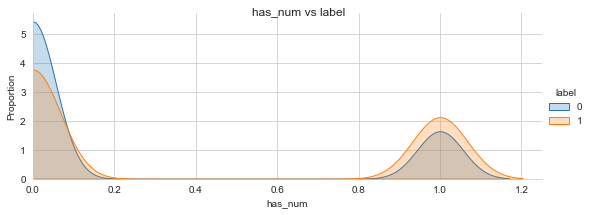

In [18]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'has_num',shade=True)
#plotOne.set(xlim=(0, df['num_tokens'].max()))
plotOne.set(xlim=(0, 1.25))
plotOne.add_legend()
plotOne.set_axis_labels('has_num', 'Proportion')
plotOne.fig.suptitle('has_num vs label')
plt.show()

## Analysis and Plot based on the Entities present (NER/NEE)

Downloading the required libraries

In [19]:
# https://polyglot.readthedocs.io/en/stable/NamedEntityRecognition.html
!pip install polyglot
!pip install PyICU
!pip install pycld2
from polyglot.downloader import downloader
print(downloader.supported_languages_table("ner2", 26))
!pip install morfessor

from polyglot.downloader import downloader
!polyglot download embeddings2.hi
!polyglot download ner2.hi

from polyglot.text import Text


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  1. Italian                    2. Hindi                      3. French                   
  4. Spanish; Castilian         5. Vietnamese                 6. Arabic                   
  7. Bulgarian                  8. Norwegian                  9. Estonian                 
 10. Japanese                  11. Greek, Modern             12. Slovene                  
 13. Korean                    14. Serbian                   15. Finnish                  
 16. Catalan; Valencian        17. Croatian                  18. Dutch                    
 19. Swedish                   20. Tagalog                   21. Danish                   
 22. Latvian                   23. Ukrainian                 24. Romanian, Moldavian, ... 
 25. Persian                   26. Slo

In [20]:
import string
def sentence_NER(sentence_list , df):

    count_PER = []
    count_ORG = []
    count_LOC = []
    PER = []
    ORG = []
    LOC = []
    
    for blob in sentence_list:
        
        text = Text(blob, hint_language_code='hi')
        for entity in text.entities:
            temp_PER = []
            temp_LOC = []
            temp_ORG = []
            if entity.tag == "I-PER":
                temp_PER.extend(entity)
            elif entity.tag == "I-LOC":
                temp_LOC.extend(entity)
            elif entity.tag == "I-ORG":
                temp_ORG.extend(entity)
        
        #remove all alphanumeric values
        temp_PER = [word for word in temp_PER if not word.isalnum() if word not in string.punctuation]
        temp_ORG = [word for word in temp_ORG if not word.isalnum() if word not in string.punctuation]
        temp_LOC = [word for word in temp_LOC if not word.isalnum() if word not in string.punctuation]
        
        count_PER.append(len(temp_PER))
        count_ORG.append(len(temp_ORG))
        count_LOC.append(len(temp_LOC))
        PER.append(temp_PER)
        ORG.append(temp_ORG)
        LOC.append(temp_LOC)
            
        
 
    df = df.assign(PER_count = count_PER)
    df = df.assign(ORG_count = count_ORG)
    df = df.assign(LOC_count = count_LOC)
    df = df.assign(PER_entities = PER)
    df = df.assign(ORG_entities = ORG)
    df = df.assign(LOC_entities = LOC)
    
    return df

df = sentence_NER(new_sentence_list,df)
   

## Generating the required columns based on the Entities present

In [21]:
sum_column = df["ORG_count"] + df["PER_count"] + df["LOC_count"]
df["total_NER"] = sum_column

df

,sentence,label,num_tokens,is_que,is_exclam,is_quote,num_stopwords,has_num,PER_count,ORG_count,LOC_count,PER_entities,ORG_entities,LOC_entities,total_NER
0,यह एक जबड़ा छोड़ने वाली डिलीवरी है! 50-टन व्हे...,0,34,0,1,0,19,1,0,0,1,[],[],[चीन],1
1,जस्टिन बीबर नई तस्वीरों की बाढ़ के साथ अपने इं...,1,14,0,0,0,5,0,2,0,0,"[जस्टिन, बीबर]",[],[],2
2,रॉल्फ हैरिस कुछ ही महीनों में मुक्त हो सकता है...,0,21,0,0,0,13,0,2,0,0,"[रॉल्फ, हैरिस]",[],[],2
3,"बीएमसी चुनाव: बीजेपी, शिवसेना ने मतदाताओं को ग...",0,15,0,0,0,5,0,0,1,0,[],[शिवसेना],[],1
4,चीनी पुलिस ने 100 किलोग्राम मेथ जब्त किया\n,0,8,0,0,0,2,1,0,1,0,[],[शिवसेना],[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41795,ईएसपीएन ने &#39;स्पोर्ट्स बबल&#39; के लीडिंग ए...,1,14,0,0,1,4,1,0,1,0,[],[ईएसपीएन],[],1
41796,जलते हुए आदमी की ये तस्वीरें आपको डब्ल्यूटीएफ ...,1,14,0,0,0,7,0,0,1,0,[],[ईएसपीएन],[],1
41797,मस्तिष्क रक्त के थक्के के साथ अस्पताल में रूपा...,0,12,0,0,0,4,0,2,0,0,"[रूपा, गांगुली]",[],[],2
41798,सबसे बड़ी आसानी के साथ। । ।\n,0,7,0,0,0,2,0,2,0,0,"[रूपा, गांगुली]",[],[],2


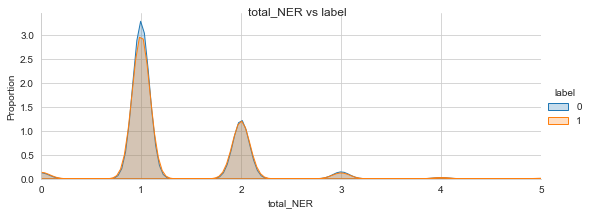

In [22]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=2.5)
plotOne.map(sns.kdeplot,'total_NER',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('total_NER', 'Proportion')
plotOne.fig.suptitle('total_NER vs label')
plt.show()

## Plotting the required graphs for Analysis Based On Entities

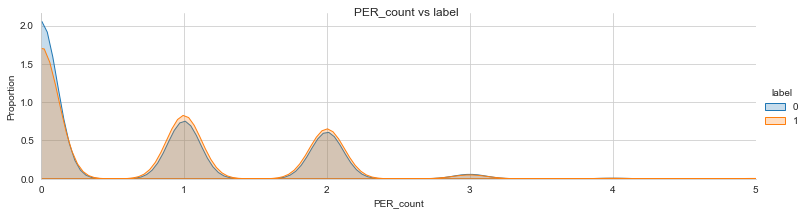

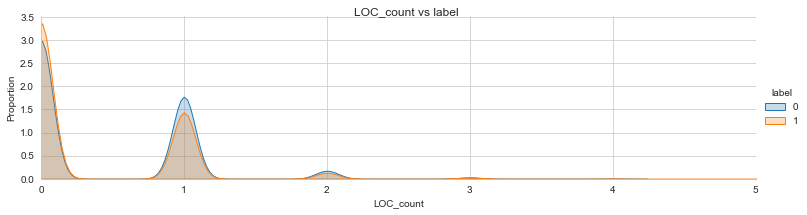

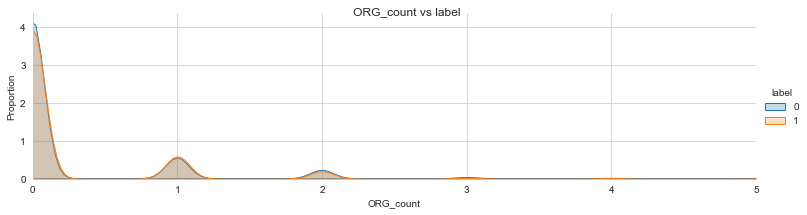

In [23]:
sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'PER_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('PER_count', 'Proportion')
plotOne.fig.suptitle('PER_count vs label')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'LOC_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('LOC_count', 'Proportion')
plotOne.fig.suptitle('LOC_count vs label')
plt.show()

sns.set_style("whitegrid")
plotOne = sns.FacetGrid(df, hue="label",aspect=3.5)
plotOne.map(sns.kdeplot,'ORG_count',shade=True)
plotOne.set(xlim=(0, 5))
plotOne.add_legend()
plotOne.set_axis_labels('ORG_count', 'Proportion')
plotOne.fig.suptitle('ORG_count vs label')
plt.show()



In [24]:
label_0 = df[df["label"] == 0]
label_1 = df[df["label"] == 1]



---


# **WordCloud Generation**


---



In [25]:
from wordcloud import WordCloud
from wordcloud.wordcloud import FONT_PATH
from collections import Counter

def split_words(entity_list):
    entity = []
    for item in entity_list:
        if len(item):
            listToStr = ' '.join(map(str, item))
            entity.append(listToStr)
    
    entity_string = ' '.join([str(elem) for elem in entity])
    list_entity = list(entity_string.split(" "))
    return list_entity
           

In [26]:
PER_0 = split_words(label_0["PER_entities"])
PER_1 = split_words(label_1["PER_entities"])
LOC_0 = split_words(label_0["LOC_entities"])
LOC_1 = split_words(label_1["LOC_entities"])
ORG_0 = split_words(label_0["ORG_entities"])
ORG_1 = split_words(label_1["ORG_entities"])

In [27]:
PER_1_only = list(set(PER_1) - set(PER_0))
PER_0_only = list(set(PER_0) - set(PER_1))
ORG_1_only = list(set(ORG_1) - set(ORG_0))
ORG_0_only = list(set(ORG_0) - set(ORG_1))
LOC_1_only = list(set(LOC_1) - set(LOC_0))
LOC_0_only = list(set(LOC_0) - set(LOC_1))

In [28]:
def Word_cloud(entity, entity_only):
    list_entity = []
    for word in entity:
        if word in entity_only:
            list_entity.append(word)
    
    dictionary=Counter(list_entity)
    print(dictionary.most_common(100))
    font = './font/Lohit-Devanagari'
    cloud = WordCloud(max_font_size=80,colormap="hsv",width=600, height=400,background_color="white",font_path=font,max_words=100).generate_from_frequencies(dictionary)
    plt.figure(figsize=(20,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return 




## Personal NER

### Non-Clickbait
Personal named entities that are only present in the non-clickbait titles

[('नवालनी', 12), ('इवांस', 9), ('नेताजी', 9), ('मिस', 8), ('टेट', 8), ('हैथवे', 7), ('लोढ़ा', 7), ('ब्लेयर', 7), ('थॉमसन', 7), ('राजनाथ', 7), ('डैन', 7), ('ब्लू', 7), ('किलर्स', 7), ('क्लीन', 6), ('ज़ो', 6), ('गांगुली', 6), ('विनायक', 6), ('नताली', 6), ('फ्लिंट', 6), ('राउत', 6), ('केटल', 6), ('कैंपबेल', 6), ('उपाध्याय', 6), ('स्टीनबर्ग', 6), ('भीमराव', 6), ('अंबेडकर', 6), ('एम्बर', 6), ('हर्ड', 6), ('बंदूकधारियों', 6), ('दिमित्री', 6), ('इके', 5), ('आर्मेन', 5), ('पेनेलोप', 5), ('वार्नर', 5), ('ब्रोकेस', 5), ('श्रीकांत', 5), ('काफ्का', 5), ('पनागरिया', 5), ('रीस', 5), ('रिकीपेडेन', 5), ('नाटो', 5), ('सपा', 5), ('मॉरिसन', 5), ('चेस', 5), ('जेंटिलोनी', 5), ('एनरिक', 4), ('कैंसिल', 4), ('इयोन', 4), ('ओमर्स', 4), ('हेल्स', 4), ('इमाम', 4), ('टीएस', 4), ('उद्धव', 4), ('अयातुल्ला', 4), ('गोल्डस्मिथ', 4), ('यूनिवर्स', 4), ('रिवोल्यूशनरी', 4), ('ग्लास', 4), ('नूगरेड', 4), ('संपोली', 4), ('ले', 4), ('स्वराज', 4), ('रैशेल', 4), ('हेहेओ', 4), ('मैकडफ', 4), ('लोगान', 4), ('बो', 4), ('फ्यूचर', 4),

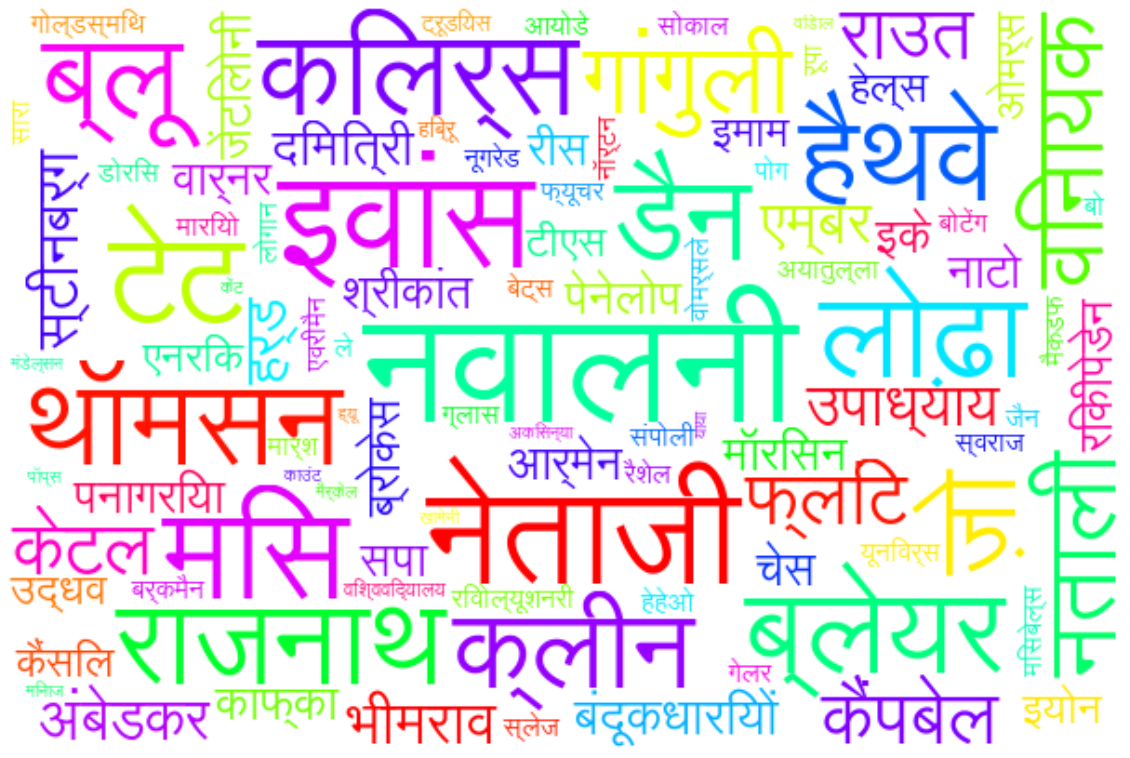

In [29]:
Word_cloud(PER_0, PER_0_only)

### Clickbait

[('पाल्ट्रो', 13), ('स्टारबक्स', 11), ('ओझा', 9), ('ग्वेनेथ', 9), ('डेमोक्रेट्स', 7), ('मैरिड', 7), ('रिएक्शन', 7), ('दाऊद', 6), ('फ्रैंकलिन', 6), ('डिक', 6), ('ग्रिंट', 6), ('ब्रेट', 6), ('जेडन', 6), ('स्पीलबर्ग', 6), ('प्लेड', 6), ('जेम्सन', 6), ('रेगी', 5), ('वाट्स', 5), ('कारमेलो', 5), ('डेस', 5), ('स्वानसन', 5), ('एगुइलेरा', 5), ('सोफी', 5), ('ड्वेन', 5), ('माया', 5), ('होम', 5), ('गैम्बियास', 5), ('ट्रेश्ड', 5), ('मेमोरियल', 5), ('पेज', 5), ('मिसेज', 5), ('कैन', 5), ('विद', 5), ('हावर्ड', 5), ('रूकी', 4), ('हैनिगन', 4), ('गर्ल्स', 4), ('स्पेल', 4), ('बॉयज़', 4), ('डेथ', 4), ('विदरस्पून', 4), ('गोर्का', 4), ('मेमे', 4), ('पांडा', 4), ('क्राउड', 4), ('महोने', 4), ('जवाब', 4), ('ग्रोवर', 4), ('रेजिना', 4), ('फाउंडिंग', 4), ('रुइन', 4), ('फैक्ट', 4), ('मिलेनियर', 4), ('मौर्य', 4), ('फेलिक्स', 3), ('गोर्सुख', 3), ('वेगा', 3), ('एटनबरो', 3), ('हरमायनी', 3), ('फ्लोरिडा', 3), ('होली', 3), ('हेगन', 3), ('नेवर', 3), ('टेकी', 3), ('एडवेंचर्स', 3), ('गेटिंग', 3), ('मैकमोहन', 3), ('नाउ', 3), 

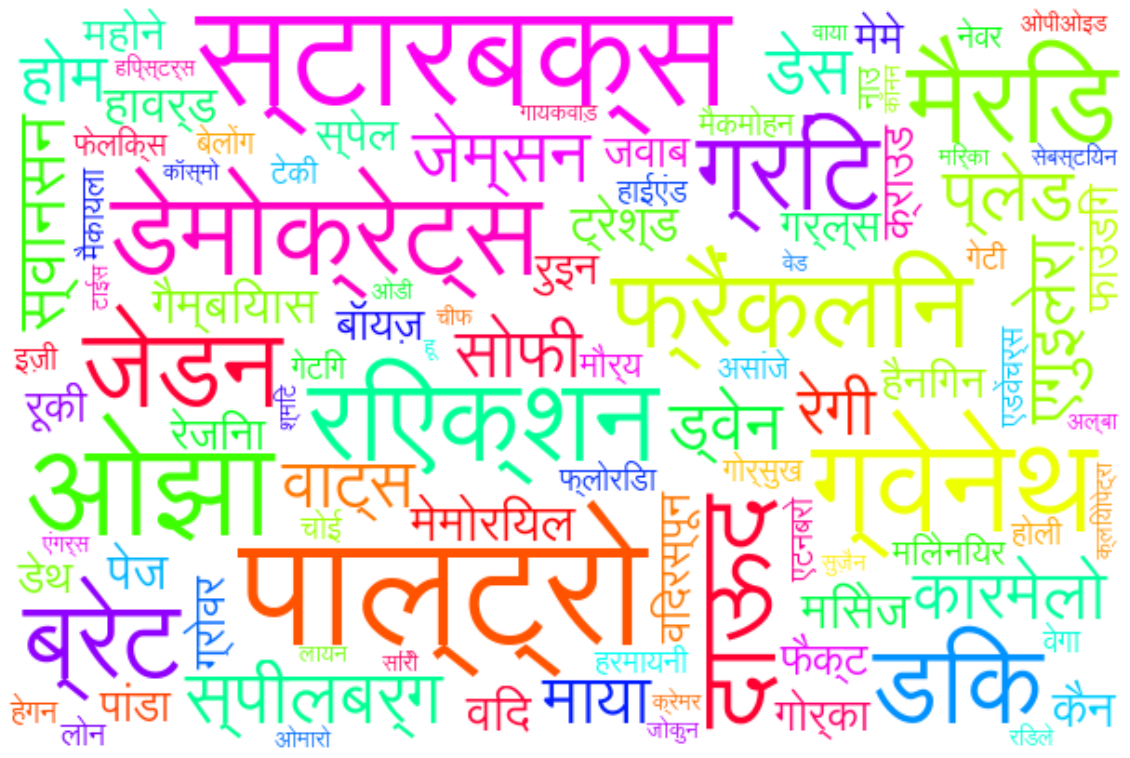

In [30]:
Word_cloud(PER_1, PER_1_only)

## Location NER

### Non-Clickbait

[('नरेगा', 9), ('विस्कॉन्सिन', 7), ('अहमदाबाद', 7), ('मद्रास', 6), ('पुष्कर', 6), ('कश्मीरी', 6), ('इस्लाम', 6), ('जिम्बाब्वे', 5), ('लेबनान', 5), ('हेनरी', 5), ('तीन', 5), ('जामनगर', 5), ('सेंटो', 5), ('रवांडा', 5), ('खापें', 5), ('वर्ल्ड', 5), ('गवर्नमेंट', 5), ('एकदिवसीय', 4), ('क्रिकेट', 4), ('इबेरिया', 4), ('रामगढ़', 4), ('अलेप्पो', 4), ('माल्टा', 4), ('हैकर्स', 4), ('दिमित्री', 4), ('पेइट', 4), ('हैम', 4), ('अफ्रीकी', 4), ('बर्मिंघम', 4), ('प्रेसीडेंसी', 4), ('राइट', 4), ('आयरिश', 4), ('व्हाइट', 4), ('क्लार्क', 4), ('गुआंतनामो', 4), ('सर्वे', 4), ('एनसीपी', 3), ('औरंगाबाद', 3), ('हिल्स', 3), ('नॉरफ़ॉक', 3), ('बरेली', 3), ('ब्रिस्टल', 3), ('बेरूत', 3), ('रियाद', 3), ('एमडी', 3), ('शेफ़ील्ड', 3), ('डेड', 3), ('कजाकिस्तान', 3), ('नाजी', 3), ('ब्रिजपोर्ट', 3), ('आसनसोल', 3), ('काहिरा', 3), ('न्यूज़क्वेस्ट', 3), ('इक्वेटोरियल', 3), ('इराकी', 3), ('कोस्टा', 3), ('माली', 3), ('जीई', 3), ('मालाबार', 3), ('ओडिशा', 3), ('उत्तरजीवितावादी', 3), ('तमिल', 3), ('इंगलैंड', 3), ('किशोर', 3), ('फै

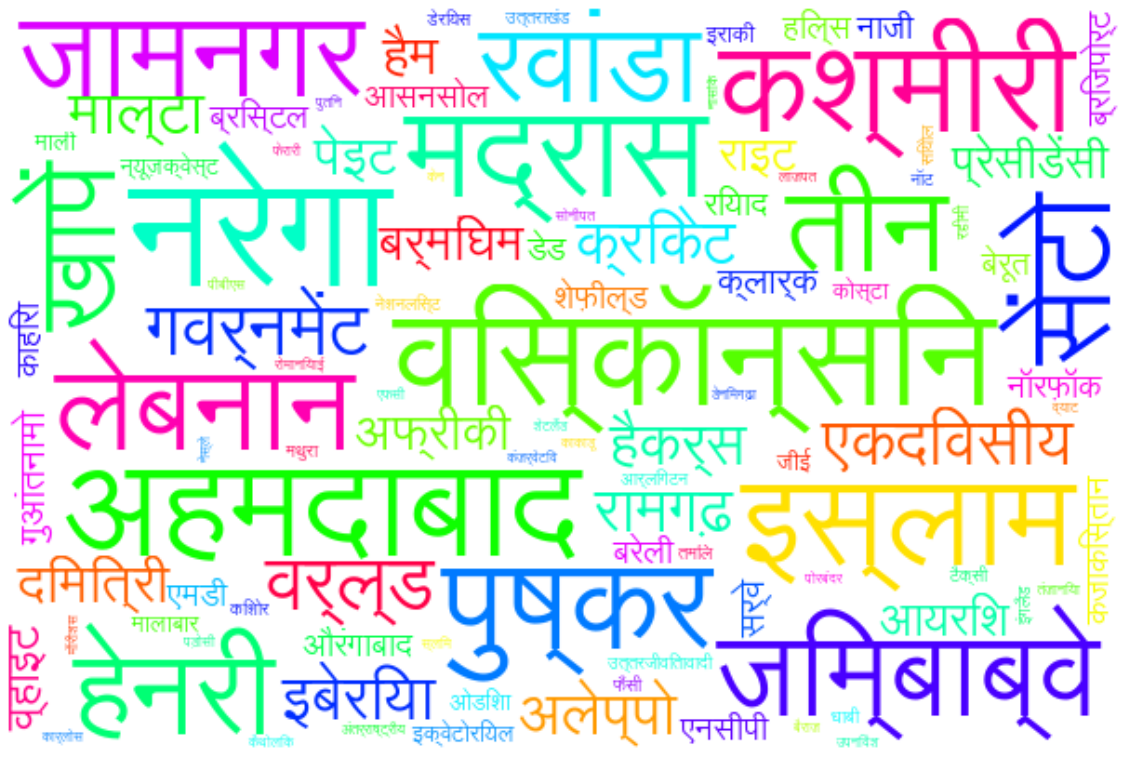

In [31]:
Word_cloud(LOC_0, LOC_0_only)

### Clickbait

[('बीवर', 6), ('लेह', 6), ('जॉन', 5), ('रूडी', 4), ('स्टेडियम', 4), ('नेकां', 4), ('सननिडेल', 4), ('तिमोर', 4), ('लीजेंड', 4), ('रशमोर', 3), ('पुर्तगाल', 3), ('द्वितीय', 3), ('लैपलैंड', 3), ('ओबामास', 3), ('बीच', 3), ('ट्रंप', 3), ('कॉमी', 3), ('फिदेल', 3), ('कास्त्रो', 3), ('ऑर्गनाइज़र', 3), ('मुग़ल', 3), ('पेंटहाउस', 3), ('लंड', 3), ('काठमांडू', 3), ('स्टेट', 3), ('पुन्स', 2), ('इटालियन', 2), ('किर्गिस्तान', 2), ('भारतीयों', 2), ('क्रिसमस', 2), ('विदेश', 2), ('डाउनटाउन', 2), ('समरसेट', 2), ('स्लोवाकिया', 2), ('देशभर', 2), ('रिकर्स', 2), ('उप्र', 2), ('ताहिती', 2), ('डेट्रायट', 2), ('जॉर्ज', 2), ('स्टूडेंट', 2), ('इलेक्शन', 2), ('ग्रॉग्स', 2), ('नैरोबी', 2), ('वेयरहाउस', 2), ('जोंगउन', 2), ('हेट', 2), ('होक्स', 2), ('ट्रम्पविरोधी', 2), ('पार्लियामेंट', 2), ('लबौर', 2), ('कान्सास', 2), ('प्राचीन', 2), ('मणिपुर', 1), ('जोसेफ', 1), ('सेल्फी', 1), ('संता', 1), ('आर्म्स', 1), ('राजधानी', 1), ('शहरों', 1), ('इंडियानापोलिस', 1), ('डीएनसी', 1), ('लौवर', 1), ('क्लेम्सन', 1), ('स्टुअन्स', 1), (

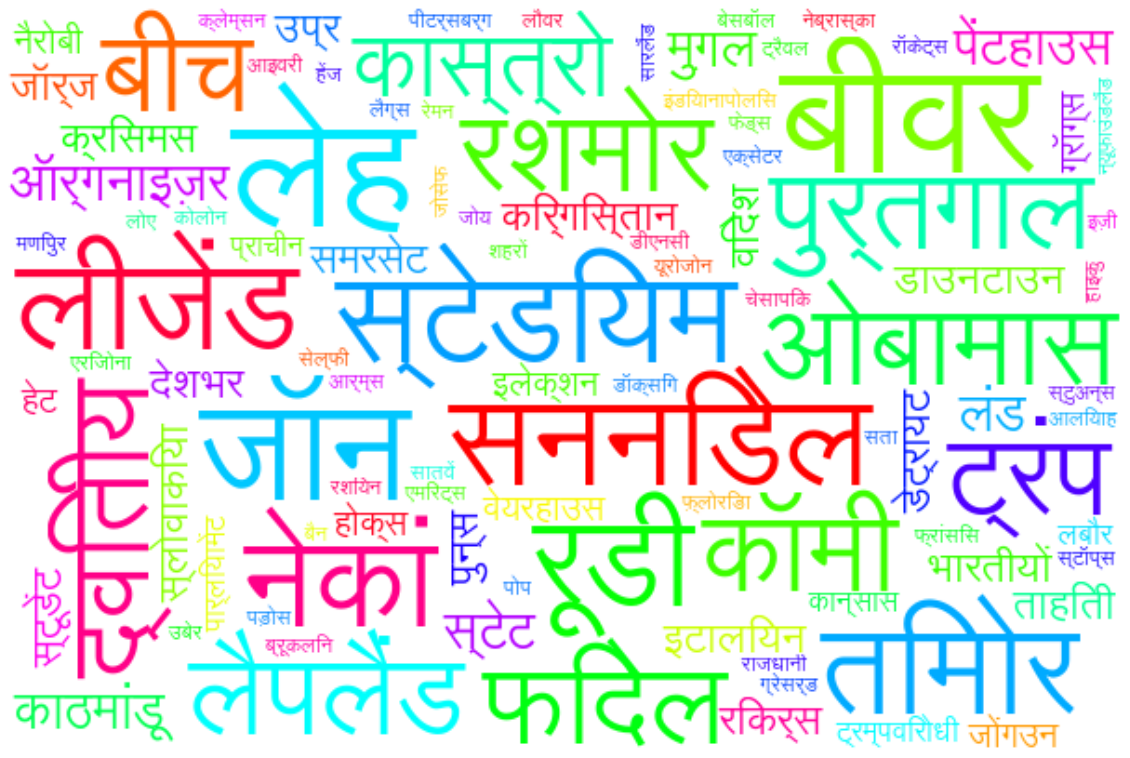

In [32]:
Word_cloud(LOC_1, LOC_1_only)

# Organisation NER

### Non-Clickbait

[('मर्चेंट', 9), ('जुवेंटस', 7), ('न्याय', 7), ('सुपर', 7), ('संरक्षण', 6), ('लोकपाल', 6), ('वायु', 5), ('पर्यावरण', 5), ('सेंट', 5), ('पीटर्सबर्ग', 5), ('ऑफ़', 5), ('ताइवान', 4), ('प्रतिनिधिमंडल', 4), ('हमास', 4), ('इंग्लिश', 4), ('बैंकॉक', 4), ('टोटेनहैम', 4), ('नीति', 4), ('क्वींस', 4), ('पूर्णकालिक', 4), ('देयर', 4), ('हेनरिक', 4), ('स्टेंसन', 4), ('बांग्लादेश', 4), ('संस', 4), ('एडिसन', 4), ('ग्रीनपीस', 4), ('एफिल', 4), ('रेलवे', 4), ('प्रूडेंशियल', 4), ('जॉन', 4), ('कैडबरी', 4), ('ग्रेग', 3), ('प्रशिक्षित', 3), ('कमांडो', 3), ('कैसीनो', 3), ('सत्ताधारी', 3), ('हार्ट्स', 3), ('डे', 3), ('मेयो', 3), ('ठाणे', 3), ('कैवानी', 3), ('ब्रेस', 3), ('हिजबुल्ला', 3), ('समर्थक', 3), ('ईयू', 3), ('हिज', 3), ('आईबीएम', 3), ('जापान', 3), ('मोहन', 3), ('बागान', 3), ('चेन्नई', 3), ('हार्ड', 3), ('दावोस', 3), ('काइल', 3), ('एडमंड', 3), ('वर्जिन', 3), ('ब्लू', 3), ('ब्रेकफास्ट', 3), ('पैरोडीडिफेंडिंग', 3), ('पोपोविच', 2), ('फॉरेस्ट', 2), ('कोस्ट', 2), ('नगरपालिका', 2), ('वर्जीनिया', 2), ('पूसा', 2)

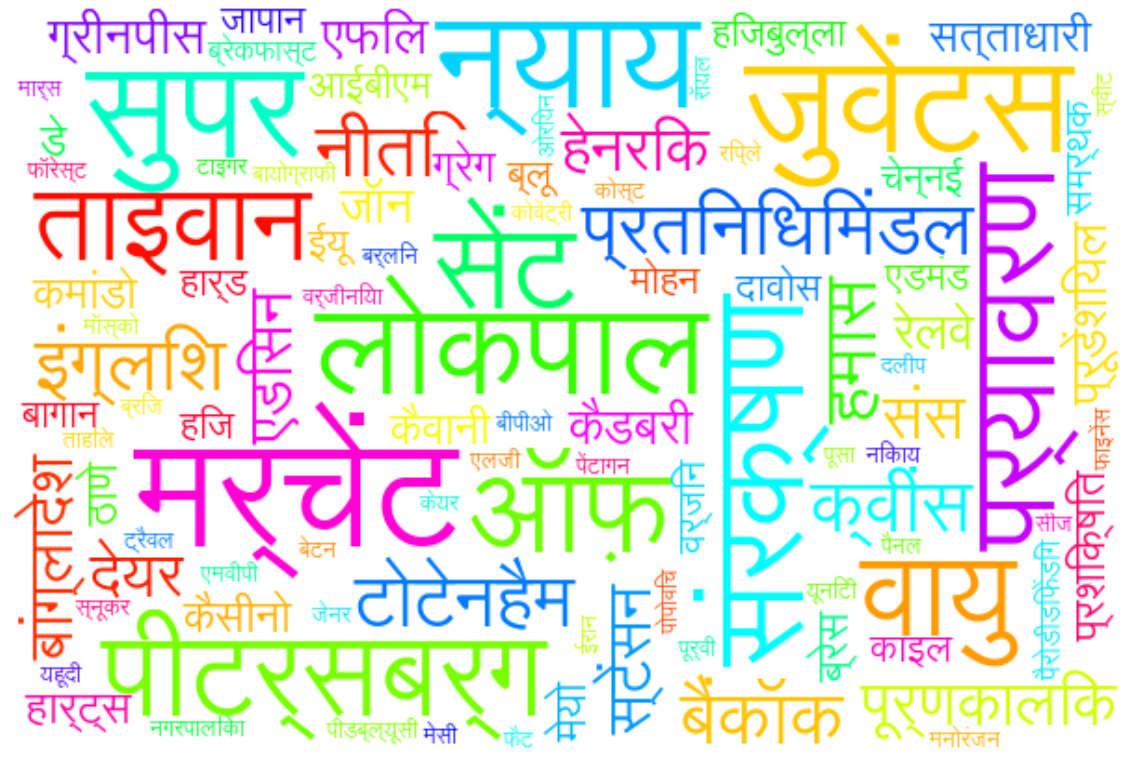

In [33]:
Word_cloud(ORG_0, ORG_0_only)

### Clickbait

[('जर्मन', 7), ('पिक्सार', 6), ('विंडोज', 6), ('वोक्सवैगन', 5), ('बान', 4), ('टिम', 4), ('जेफ़', 4), ('रिजर्व', 4), ('पोर्ट्रेट', 4), ('गोथम', 4), ('बीपी', 4), ('केमैन', 4), ('इंटरनेट', 4), ('कीस्टोन', 4), ('डिज्नी', 3), ('नाथन', 3), ('बेडफोर्ड', 3), ('रशमोर', 3), ('क्रिस्मस', 3), ('केली', 3), ('आयोटे', 3), ('कॉनस', 3), ('हैम्पशायर', 3), ('वोग', 3), ('ज्योग्राफिक', 3), ('ब्लैंड', 3), ('बॉडीगार्ड', 3), ('सदर्न', 3), ('ओरेगन', 3), ('दुबई', 3), ('हमलावर', 3), ('एरिक', 3), ('होल्डर', 3), ('रिप्स', 3), ('पुनर्जागरण', 3), ('नाइस', 3), ('डिप्टी', 3), ('एक्सेल', 2), ('वेटिकन', 2), ('मिनेसोटा', 2), ('वॉल्ट', 2), ('जेसी', 2), ('पेनी', 2), ('इलस्ट्रेटेड', 2), ('जर्सी', 2), ('एबे', 2), ('यूनिसेफ', 2), ('कैलिफ़ोर्निया', 2), ('जस्टिस', 2), ('होलीवुड', 2), ('एमएसएनबीसी', 2), ('टीवी', 2), ('एंटोनियो', 2), ('लैंग्वेज', 2), ('म्यूजिकल', 2), ('साइन', 2), ('जॉर्डन', 2), ('क्रूज़', 2), ('पोल', 2), ('टोयोटा', 2), ('अलबामा', 2), ('जापानी', 2), ('प्रधानमंत्री', 2), ('अंडरवाटर', 2), ('लिंकिन', 2), ('स्पेनिश', 

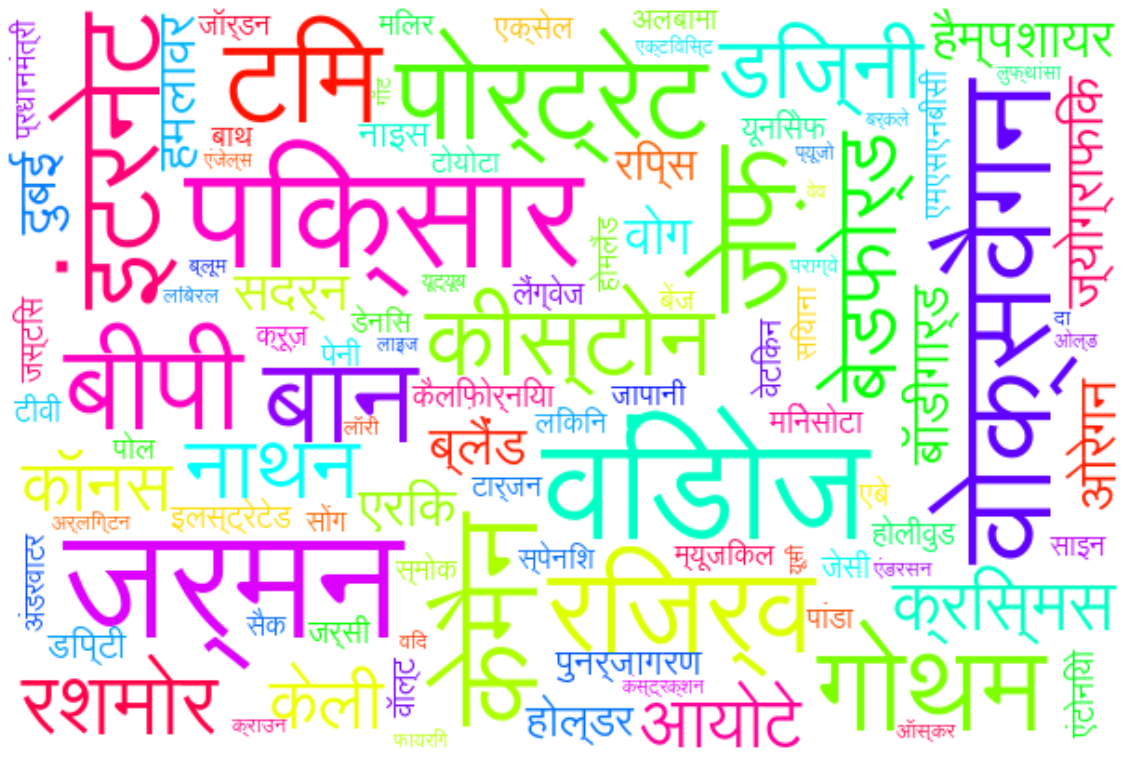

In [34]:
Word_cloud(ORG_1, ORG_1_only)

# **Analysis and Plots Based on POS Tags**

In [35]:
!pip install stanza
import stanza
stanza.download('hi')

Defaulting to user installation because normal site-packages is not writeable


2021-07-28 13:16:11 INFO: Downloading default packages for language: hi (Hindi)...


2021-07-28 13:16:12 INFO: File exists: /home/esh/stanza_resources/hi/default.zip.
2021-07-28 13:16:13 INFO: Finished downloading models and saved to /home/esh/stanza_resources.


In [36]:
nlp=stanza.Pipeline(lang='hi',processors='tokenize,pos,lemma')
ct=0
label=df['label'].to_list()
noun=[[0]*50,[0]*50]
verb=[[0]*50,[0]*50]
adj=[[0]*50,[0]*50]
n_lst=[]
v_lst=[]
a_lst=[]
nva=[0,0,0]
for sentence in sentence_list:
  s_label=label[ct]
  out=nlp(sentence)
  lst=[word.pos for sent in out.sentences for word in sent.words]
  for i in lst:
    if i=='NOUN' or i=='PROPN':
      nva[0]+=1
    elif i=='VERB':
      nva[1]+=1
    elif i=='ADJ' or i=='NUM':
      nva[2]+=1
    else:
      continue
  n_lst.append(nva[0])
  v_lst.append(nva[1])
  a_lst.append(nva[2])


  if nva[0]>=50 or nva[1]>=50 or nva[2]>=50:
    ct+=1
    continue
  
  noun[s_label][nva[0]]+=1
  verb[s_label][nva[1]]+=1
  adj[s_label][nva[2]]+=1
  nva=[0,0,0]
  ct+=1

df = df.assign(num_noun = n_lst)
df = df.assign(num_verb = v_lst)
df = df.assign(num_adj = a_lst)


2021-07-28 13:16:13 INFO: Loading these models for language: hi (Hindi):
| Processor | Package |
-----------------------
| tokenize  | hdtb    |
| pos       | hdtb    |
| lemma     | hdtb    |

2021-07-28 13:16:13 INFO: Use device: cpu
2021-07-28 13:16:13 INFO: Loading: tokenize
2021-07-28 13:16:13 INFO: Loading: pos
2021-07-28 13:16:14 INFO: Loading: lemma
2021-07-28 13:16:14 INFO: Done loading processors!


KeyboardInterrupt: 

In [ ]:
plt.bar(np.arange(26),noun[0][:26],color='g',label='Non-Clickbait',width=0.25)
plt.bar(np.arange(26)+0.25,noun[1][:26],color='r',label='Clickbait',width=0.25)
plt.xlabel("Number of nouns in a line")
plt.ylabel("Number of lines")
plt.title("Nouns")
plt.legend()
plt.show()
plt.close()

In [ ]:
plt.bar(np.arange(10),verb[0][:10],color='g',label='Non-Clickbait',width=0.25)
#plt.plot(verb[1][:30],color='r',label='cl')
plt.bar(np.arange(10)+0.25,verb[1][:10],color='r',label='Clickbait',width=0.25)
plt.xlabel("Number of verbs in a line")
plt.ylabel("Number of lines")
plt.title("Verbs")
plt.legend()
#plt.savefig(fname='verb.png')
plt.show()
plt.close()

In [ ]:
plt.bar(np.arange(12),adj[0][:12],color='g',label='Non-Clickbait',width=0.25)
#plt.plot(adj[1][:30],color='r',label='cl')
plt.bar(np.arange(12)+ 0.25,adj[1][:12],color='r',label='Clickbait',width=0.25)
plt.xlabel("Number of adjectives in a line")
plt.ylabel("Number of lines")
plt.title("Adjectives")
plt.legend()
#plt.savefig(fname='adj.png')
plt.show()
plt.close()

## Now, we:
1. Combining all the CSV files generated during analysis
2. Converting the total dataframe into CSV file for prediction purposes

In [ ]:
df1 = df
df1.drop('LOC_entities', inplace=True, axis=1)
df1.drop('ORG_entities', inplace=True, axis=1)
df1.drop('PER_entities', inplace=True, axis=1)
df1.to_csv('pre_f.csv', index=False)

path = "./data/pos_data.csv"
df2 = pd.read_csv(path)
df2.drop('id', inplace=True, axis=1)

result = pd.concat([df1, df2], axis=1, join='inner')
result.to_csv('./data/final_parameters.csv', index=False)
#Final CSV file with all the final parameters generated